In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110] )
ks  = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x = zp
y = ks
n = x.size
n

10

In [3]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

2.620538882402765

In [4]:
def estimate(x, y):
    y_av = y.mean() 
    x_av = x.mean()
    
    b1 = ((x - x_av) * (y - y_av )).sum() / ((x - x_av) ** 2).sum()
    b0 = y_av - b1 * x_av 
    
    return b0, b1

def predict_estimated(x, b0, b1):
    return b0 + x * b1

In [5]:

b0, b1 = estimate(x, y)
print(f"Коэффициет b0 = {b0} и b1 = {b1} ")

Коэффициет b0 = 444.17735732435955 и b1 = 2.6205388824027653 


**2 способ расчета**

In [6]:
def matrix_estimated(x, y):
    return np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)



In [7]:
X = x.reshape((n,1))
Y_ = y.reshape((n,1))
X_ = np.hstack([np.ones((n,1)), X])
X_

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

так же с интерсептом

In [8]:
matrix_estimated(X_, Y_)

array([[444.17735732],
       [  2.62053888]])

**без интерсепта**

In [9]:
b2 = matrix_estimated(X, Y_)
b2


array([[5.88982042]])

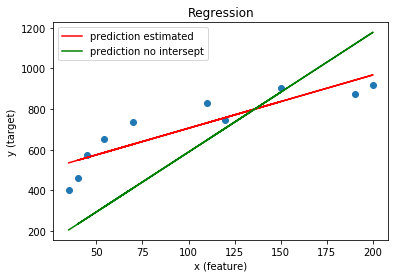

In [20]:
plt.scatter(x, y)
plt.title("Regression")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, predict_estimated(x, b0, b1), color='red', label='prediction estimated')
plt.plot(x, x*b2[0], color='green', label='prediction no intersept')
plt.legend()

### Задача 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept)

In [11]:
x = zp
y = ks
n

10

In [12]:
def mse_(B1, y=y, x=x, n=n):
    return np.sum((B1*x - y)**2)/n

In [13]:
mse_(b2[0])

56516.8584157194

In [19]:
B1 = 0.1
alpha = 1e-6
for i in range(10000):
    b_=B1
    B1 -= alpha*(2/n)*np.sum((B1*x-y)*x)
    
    if i%100==0:
        print(f"Iteration:  {i}, B1 = {B1}, MSE = {mse_(B1)}")
        
    if (b_== B1):
          break
   

Iteration:  0, B1 = 0.25952808, MSE = 493237.7212546963
Iteration:  100, B1 = 5.54537842245223, MSE = 58151.31823171113
Iteration:  200, B1 = 5.868748638669329, MSE = 56522.97550129376
Iteration:  300, B1 = 5.888531320728348, MSE = 56516.88130936019
Iteration:  400, B1 = 5.8897415574471985, MSE = 56516.85850140053
Iteration:  500, B1 = 5.889815595583751, MSE = 56516.858416040064
Iteration:  600, B1 = 5.889820124983314, MSE = 56516.85841572062
Iteration:  700, B1 = 5.889820402076462, MSE = 56516.85841571941
Iteration:  800, B1 = 5.88982041902807, MSE = 56516.8584157194
Iteration:  900, B1 = 5.889820420065112, MSE = 56516.85841571941
Iteration:  1000, B1 = 5.8898204201285544, MSE = 56516.85841571941
Iteration:  1100, B1 = 5.889820420132437, MSE = 56516.85841571943


### Задача 3
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Если **известна** дисперсия генеральной совокупности то используем таблицу **Лапласа**

Если дисперсия генеральной совокупности **неизвестна** - то тогда используем таблицу **Стьюдента**
    


### Задача 4
Сорри, на 4 задачу сил и времени уже не хватило ((